# Text Mining & Image Recognition
## Hoja de Trabajo # 1

In [ ]:
#pip install opencv-python

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import skimage.color
import skimage.io

#### Problema 1:
Desarrolle una función la cual reciba dos parámetros, una imagen y un entero llamado color, la
función debe devolver una imagen la cual tenga activos los canales de color según los puntos dados.os:

In [79]:
def colores (imagen,color):
    altura = imagen.shape[0]
    ancho = imagen.shape[1]
    cuadro = np.zeros((altura,ancho,3))

    if color == 1:
        for i in range(0, altura):
            for j in range (0, ancho):
                pixel = imagen[i,j]
                blue = pixel[2]
                green = pixel[1]
                red = pixel[0]
                cuadro[i,j] = [blue,0,0]
            
    elif color == 2:
        for i in range(0, altura):
            for j in range (0, ancho):
                pixel = imagen[i,j]
                blue = pixel[2]
                green = pixel[1]
                red = pixel[0]
                cuadro[i,j] = [0,green,0]
            
    elif color == 3:
        for i in range(0, altura):
            for j in range (0, ancho):
                pixel = imagen[i,j]
                blue = pixel[2]
                green = pixel[1]
                red = pixel[0]
                cuadro[i,j] = [0,0,red]
        
    elif color == 10:
        for i in range(0, altura):
            for j in range (0, ancho):
                pixel = imagen[i,j]
                blue = pixel[2]
                green = pixel[1]
                red = pixel[0]
                cuadro[i,j] = [0,green,red]
            
    elif color == 20:
        for i in range(0, altura):
            for j in range (0, ancho):
                pixel = imagen[i,j]
                blue = pixel[2]
                green = pixel[1]
                red = pixel[0]
                cuadro[i,j] = [blue,green,0]

    elif color == 30:
        for i in range(0, altura):
            for j in range (0, ancho):
                pixel = imagen[i,j]
                blue = pixel[2]
                green = pixel[1]
                red = pixel[0]
                cuadro[i,j] = [blue,0,red]
            
            
    cv2.imwrite("resultado.jpg",cuadro)
    resultado = cv2.imread("resultado.jpg")
    resultado = cv2.cvtColor(resultado,cv2.COLOR_BGR2RGB)
    plt.imshow(resultado)
    plt.show()

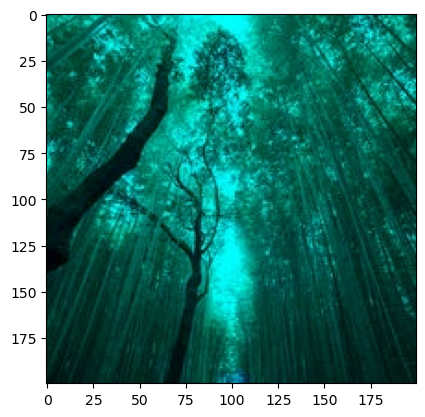

In [96]:
# Prueba de la función del Problema 1
imagen_nueva = cv2.imread("paisaje.jpg")
color = 20
colores(imagen_nueva, color) 

#### Problema 2:
En el .zip del laboratorio se le compartió un conjunto de imágenes en escala de grises (imagen1,imagen2, perro), estas imágenes fueron creadas utilizando una escala de grises en 3D. Cree una función que, dadas las 3 imágenes, construya la imagen original a color.

In [61]:
def combinar_imagenes(gris_rojo, gris_verde, gris_azul):
    # Leer las imágenes en escala de grises
    img_rojo = cv2.imread(gris_rojo, cv2.IMREAD_GRAYSCALE)
    img_verde = cv2.imread(gris_verde, cv2.IMREAD_GRAYSCALE)
    img_azul = cv2.imread(gris_azul, cv2.IMREAD_GRAYSCALE)
    
    # Verificar que todas las imágenes tengan las mismas dimensiones
    if img_rojo.shape != img_verde.shape or img_rojo.shape != img_azul.shape:
        raise ValueError("Todas las imágenes deben tener las mismas dimensiones")
    
    # Combinar las imágenes en una sola imagen a color
    imagen_color = cv2.merge((img_azul, img_verde, img_rojo))
    
    # Guardar y mostrar la imagen resultante
    cv2.imwrite("imagen_color.jpg", imagen_color)
    imagen_resultado = cv2.imread("imagen_color.jpg")
    imagen_resultado = cv2.cvtColor(imagen_resultado, cv2.COLOR_BGR2RGB)
    plt.imshow(imagen_resultado)
    plt.axis('off')
    plt.show()

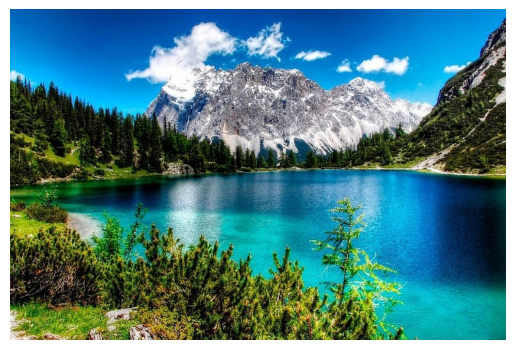

In [87]:
#Prueba de la función del Problema 2
combinar_imagenes("imagen1_salida_gray_rojo.jpg", "imagen1_salida_gray_verde.jpg", "imagen1_salida_gray_azul.jpg")

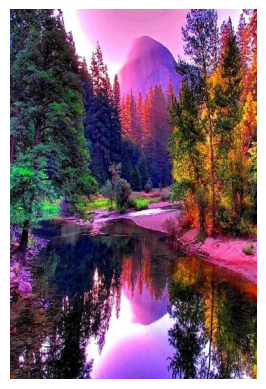

In [65]:
#Prueba de la función del Problema 2
combinar_imagenes("imagen2_salida_gray_rojo.jpg", "imagen2_salida_gray_verde.jpg", "imagen2_salida_gray_azul.jpg")

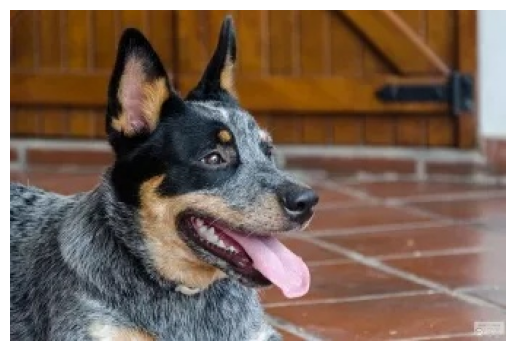

In [67]:
#Prueba 2 de la función del Problema 2
combinar_imagenes("perro_salida_gray_rojo.jpg", "perro_salida_gray_verde.jpg", "perro_salida_gray_azul.jpg")

#### Problema 3:
Cree una función que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su función debe crear 3 imágenes como salida. Para entregar este ejercicio debe incluir una las imágenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la imagen del Problema #2. 

In [14]:
def escala_grises_3D(imagen_original):
    # Leer la imagen original
    img = cv2.imread(imagen_original)
    
    # Separar los canales de la imagen (rojo, verde, azul)
    azul, verde, rojo = cv2.split(img)
    
    # Guardar cada canal como una imagen en escala de grises
    cv2.imwrite("gris_rojo.jpg", rojo)
    cv2.imwrite("gris_verde.jpg", verde)
    cv2.imwrite("gris_azul.jpg", azul)
    
    # Mostrar las imágenes en escala de grises
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    axs[0].imshow(rojo, cmap='gray')
    axs[0].set_title('Escala de grises - Rojo')
    axs[0].axis('off')
    
    axs[1].imshow(verde, cmap='gray')
    axs[1].set_title('Escala de grises - Verde')
    axs[1].axis('off')
    
    axs[2].imshow(azul, cmap='gray')
    axs[2].set_title('Escala de grises - Azul')
    axs[2].axis('off')
    
    plt.show()

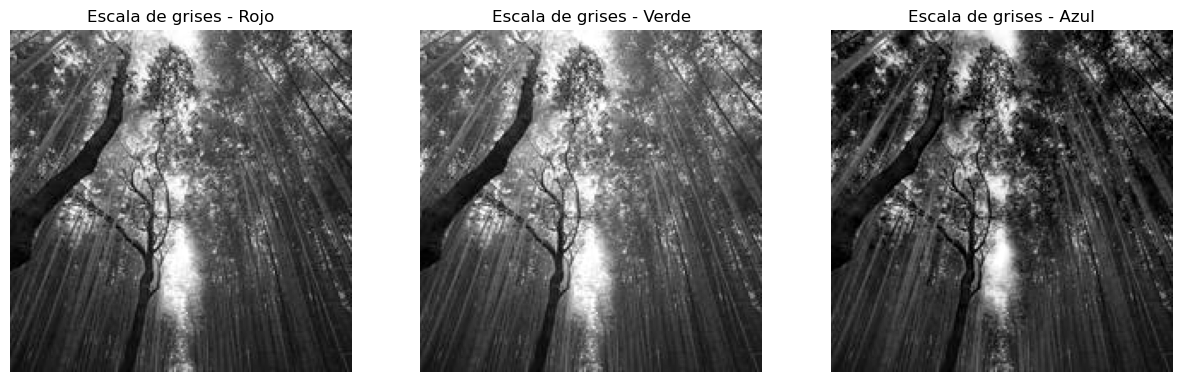

In [83]:
# Prueba de la función del Problema 3
escala_grises_3D("paisaje.jpg")

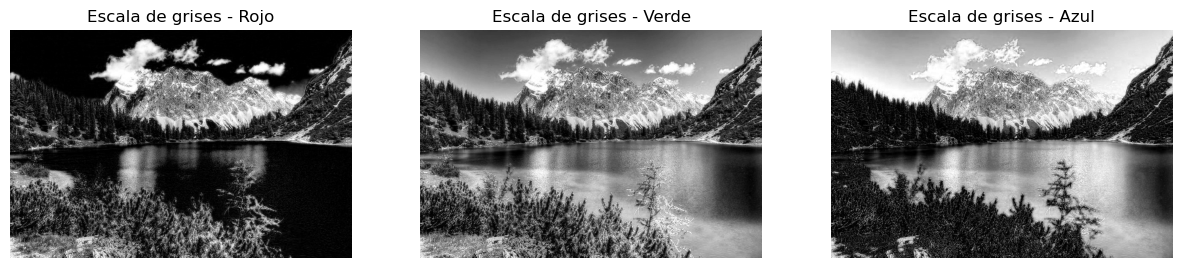

In [89]:
# Prueba 2 de la función del Problema 3
escala_grises_3D("imagen_color.jpg")

#### Problema 4:
Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una linea vertical la cual muestre el valor de la media de la distribucion.

In [35]:
def mostrar_histogramas(imagen_original):
    # Leer la imagen
    img = cv2.imread(imagen_original)
    
    # Separar los canales
    azul, verde, rojo = cv2.split(img)
    
    # Convertir la imagen a escala de grises usando un promedio aritmético manual sin OpenCV
    escala_grises = (0.299 * rojo + 0.587 * verde + 0.114 * azul).astype(np.uint8)

    # Función para calcular y mostrar el histograma de un canal
    def mostrar_histograma(canal, color, nombre):
        hist, bins = np.histogram(canal.flatten(), 256, [0, 256])
        plt.plot(hist, color=color)
        
        # Calcular la media
        media = np.mean(canal)
        
        # Dibujar una línea vertical en la media
        plt.axvline(media, color=color, linestyle='dashed', linewidth=1)
        plt.title(f'Histograma {nombre} - Media: {media:.2f}')
        plt.xlim([0, 256])
        plt.xlabel('Intensidad')
        plt.ylabel('Frecuencia')
        plt.show()

    # Mostrar histogramas para los canales rojo, verde, azul y escala de grises
    plt.figure(figsize=(10, 6))

    mostrar_histograma(rojo, 'r', 'Rojo')
    mostrar_histograma(verde, 'g', 'Verde')
    mostrar_histograma(azul, 'b', 'Azul')
    mostrar_histograma(escala_grises, 'gray', 'Escala de Grises')

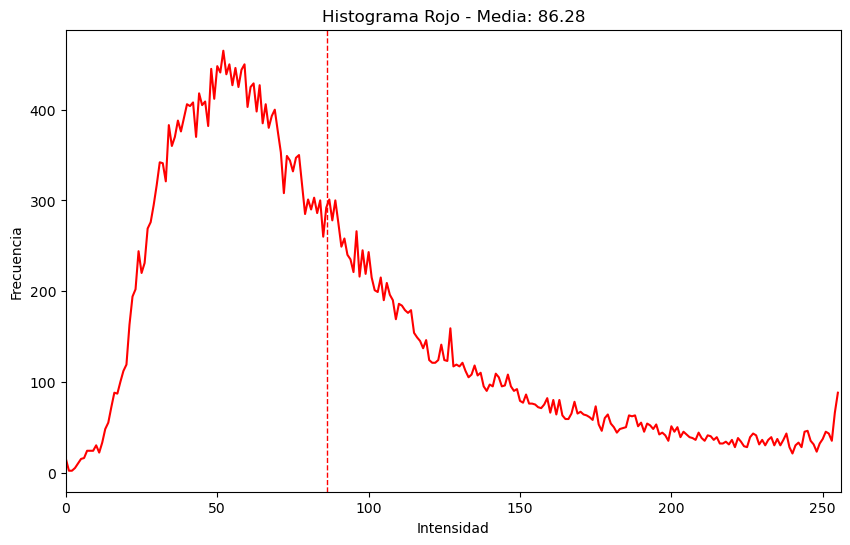

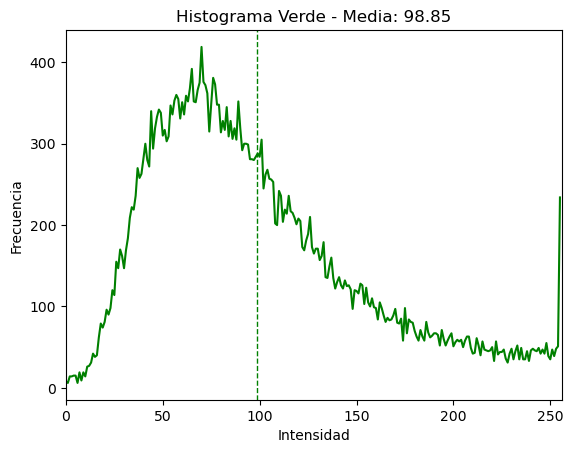

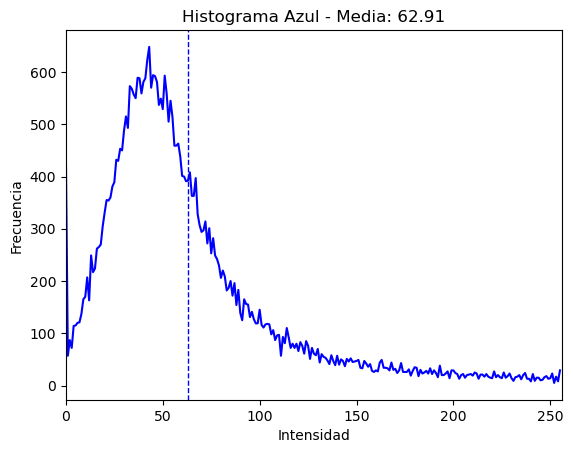

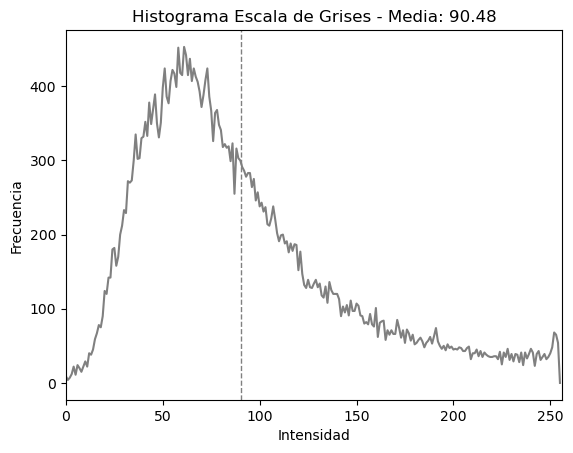

In [91]:
# Prueba de la función del Problema 4
mostrar_histogramas("paisaje.jpg")

#### Problema 5:
Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una función que, dada una imagen, realice una escala de grises ponderada (notar que no existe una solución unica). 

In [41]:
def escala_grises_ponderada(imagen_original, pesos=(0.299, 0.587, 0.114)):
    # Leer la imagen
    img = cv2.imread(imagen_original)
    
    # Separar los canales
    azul, verde, rojo = cv2.split(img)
    
    # Aplicar los pesos para la conversión a escala de grises
    ponderada = (pesos[0] * rojo + pesos[1] * verde + pesos[2] * azul).astype(np.uint8)
    
    # Guardar y mostrar la imagen en escala de grises
    cv2.imwrite("imagen_gris_ponderada.jpg", ponderada)
    imagen_resultado = cv2.imread("imagen_gris_ponderada.jpg")
    plt.imshow(imagen_resultado, cmap='gray')
    plt.axis('off')
    plt.show()

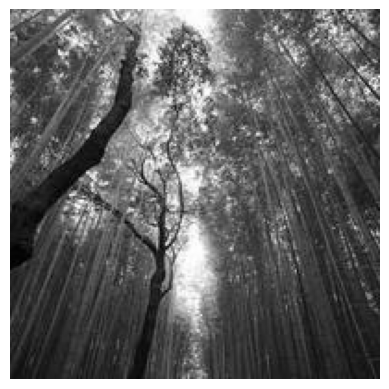

In [43]:
# Prueba de la función del Problema 5
escala_grises_ponderada("paisaje.jpg", pesos=(0.299, 0.587, 0.114))

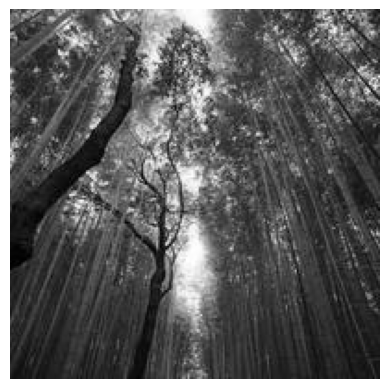

In [47]:
# Prueba 2 de la función del Problema 5
escala_grises_ponderada("paisaje.jpg", pesos=(0.2, 0.4, 0.4))

#### Problema 6:
Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho espacio, para entregar este ejercicio puede hacerlo por medio de Markdown en el mismo Notebook donde trabajo los demás ejercicios. 

# Problema 6: Espacio de Color HSV

## ¿Qué es el espacio de color HSV?
El espacio de color **HSV** (Hue, Saturation, Value) es una representación alternativa de los colores que, en lugar de usar los componentes rojo, verde y azul (RGB), se basa en las características que las personas suelen usar para describir los colores.

- **Hue (Matiz)**: Representa el color en sí mismo y se mide en grados (0° a 360°). Los valores corresponden a colores, como se muestra a continuación:
  - 0°: Rojo
  - 60°: Amarillo
  - 120°: Verde
  - 180°: Cian
  - 240°: Azul
  - 300°: Magenta
- **Saturation (Saturación)**: Indica la intensidad del color. Un valor de saturación del 0% corresponde a un tono de gris, mientras que el 100% representa el color más puro.
- **Value (Valor)**: También llamado brillo o luminosidad, se refiere a qué tan claro u oscuro es el color. Un valor bajo produce colores más oscuros, y un valor alto, más brillantes.

El espacio de color HSV es útil en procesamiento de imágenes cuando es necesario manipular los colores de una manera más intuitiva, por ejemplo, para ajustar el brillo o la saturación sin afectar el color base (matiz).

## Mapeo de colores en el espacio HSV
El espacio HSV se define dentro de un cilindro de colores:

- **Matiz (H)**: Mide el ángulo alrededor del eje vertical del cilindro.
- **Saturación (S)**: Mide la distancia radial desde el eje.
- **Valor (V)**: Mide la altura del cilindro.

En resumen:
- El **matiz** define el tipo de color (rojo, verde, azul, etc.).
- La **saturación** indica la pureza del color.
- El **valor** ajusta la luminosidad del color.

## Conversión a espacio de color HSV en Python
Ahora, vamos a implementar una función en Python que convierta una imagen del espacio RGB al espacio HSV utilizando OpenCV.

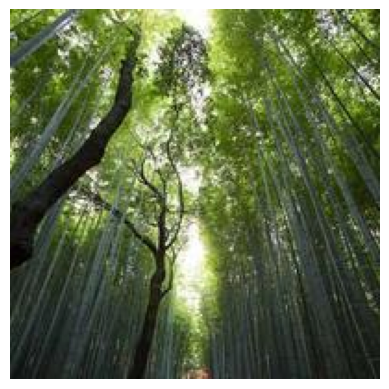

In [94]:
import cv2
import matplotlib.pyplot as plt

# Conversión de imagen a espacio de color HSV
def convertir_a_hsv(imagen_original):
    # Leer la imagen
    img = cv2.imread(imagen_original)
    
    # Convertir la imagen al espacio de color HSV
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Guardar y mostrar la imagen en espacio HSV
    cv2.imwrite("imagen_hsv.jpg", img_hsv)
    imagen_resultado = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)  # Convertir a RGB para visualizar correctamente
    plt.imshow(imagen_resultado)
    plt.axis('off')
    plt.show()

# Prueba de la función del Problema 6
convertir_a_hsv("paisaje.jpg")